In [1]:
#Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
#Draw the inferences from the clusters obtained.

#Data Description:
 
#The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

#ID --Unique ID

#Balance--Number of miles eligible for award travel

#Qual_mile--Number of miles counted as qualifying for Topflight status

#cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
#cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
#cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

#1 = under 5,000
#2 = 5,000 - 10,000
#3 = 10,001 - 25,000
#4 = 25,001 - 50,000
#5 = over 50,000

#Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

#Bonus_trans--Number of non-flight bonus transactions in the past 12 months

#Flight_miles_12mo--Number of flight miles in the past 12 months

#Flight_trans_12--Number of flight transactions in the past 12 months

#Days_since_enrolled--Number of days since enrolled in flier program

#Award--whether that person had award flight (free flight) or not


 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('EastWestAirlines.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [6]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x24b4a76e400>,
 'caps': [<matplotlib.lines.Line2D at 0x24b4a76eac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b4a76e0a0>,
 'medians': [<matplotlib.lines.Line2D at 0x24b4a77a1c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24b4a77a520>,
 'means': []}

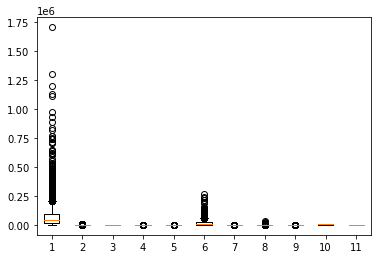

In [9]:
plt.boxplot(df)

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated()]

In [ ]:

df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 250
sns.set_style('darkgrid')

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

In [ ]:


sns.boxplot(df)
